In [1]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

## Strategies 

In [74]:
def startegy1(date_to_eur_currency, last_date, last_ratio, change_rate=0.5):
    current_money_amount = 100
    current_currency = "USD"
    for date,ratio in date_to_eur_currency.items():
        if ratio < last_ratio:
            change = 100*(1-(ratio/last_ratio))
            if change > change_rate:
                if current_currency == "EUR":
                    current_money_amount = current_money_amount * ratio
                    current_currency = "USD"
            else:
                if current_currency == "USD":
                    current_money_amount = current_money_amount / ratio
                    current_currency = "EUR"
        else:
            if current_currency == "EUR":
                current_money_amount = current_money_amount * ratio
                current_currency = "USD"

        last_ratio = ratio
    
    last_date = list(date_to_eur_currency.keys())[-1]
    if current_currency == "EUR":
        current_money_amount = current_money_amount * date_to_eur_currency[last_date]
    
    return current_money_amount/100

def startegy2(date_to_eur_currency, last_date, last_ratio):
    current_money_amount = 100
    current_currency = "USD"
    for date,ratio in date_to_eur_currency.items():
        if ratio > last_ratio:
            if current_currency == "EUR":
                pass
            else:
                current_money_amount = current_money_amount / ratio
                current_currency = "EUR"
        else:
            if current_currency == "EUR":
                current_money_amount = current_money_amount * ratio
                current_currency = "USD"
            else:
                pass

        last_ratio = ratio
    
    last_date = list(date_to_eur_currency.keys())[-1]
    if current_currency == "EUR":
        current_money_amount = current_money_amount * date_to_eur_currency[last_date]

    return current_money_amount/100


In [79]:
def convert_to_datetime(string_date):
    return datetime.strptime(string_date, '%Y-%m-%d')

def build_data(start_date, end_date):    
    start_date = datetime.strptime(start_date, '%Y-%m-%d')
    end_date = datetime.strptime(end_date, '%Y-%m-%d')

    date_to_eur_currency = {}

    with open('dataset.csv') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            temp_date = convert_to_datetime(row['Date'])
            if temp_date >= start_date and temp_date <= end_date:
                if(row['Euro'] != ""):
                    date_to_eur_currency[temp_date.strftime('%Y-%m-%d')] = float(row['Euro'])
    
    return date_to_eur_currency


# returns the yield percente of our algotihm
def trade(year, strategy, change_rate):
    date_to_eur_currency = build_data("{}-1-1".format(year), "{}-12-31".format(year))
    last_date = list(date_to_eur_currency.keys())[0]
    last_ratio = date_to_eur_currency[last_date]
    date_to_eur_currency.pop(last_date, '')
    return strategy(date_to_eur_currency, last_date, last_ratio, change_rate)


## Check different percentage and how it effects on the strategy outcomes 

In [61]:
## NEW CODE ##

def invest_period(period, change_rate):
    last_date = list(period.keys())[0]
    last_ratio = period[last_date]
    period.pop(last_date, '')
    return startegy1(period, last_date, last_ratio, change_rate)
    

# Parameters explain:
# nun_periods - how many periods we want to examine (if we send periods=10 then it will divide the year to 10 parts)
# year - the year we examine the investmant
def check_diff_percentage_over_time(nun_periods, year, percentage):
    date_to_eur_currency = build_data("{}-1-1".format(year), "{}-12-31".format(year))
    period_length = int(len(date_to_eur_currency) / nun_periods)
    invest_result = []
    
    for i in range(nun_periods):
        period = {x: date_to_eur_currency[x] for x in sorted(date_to_eur_currency.keys())\
                          [i*period_length : (i+1)*period_length]}
        invest_result.append(invest_period(period, percentage))
        
    ## handling the last period - the left overs
#     if nun_periods*period_length <  len(date_to_eur_currency):
#         period = {x: date_to_eur_currency[x] for x in sorted(date_to_eur_currency.keys())\
#                           [nun_periods*period_length : ]}
#         invest_result.append(invest_period(period, percentage))
    
    return invest_result    

In [62]:
np.linspace(0.1,1.1,10,endpoint=False)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [63]:
from collections import Counter

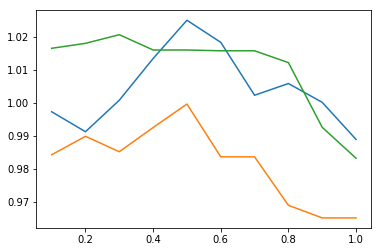

For period 1 the best percenteage is: 0.5
For period 2 the best percenteage is: 0.5
For period 3 the best percenteage is: 0.30000000000000004
For period 4 the best percenteage is: 1.0


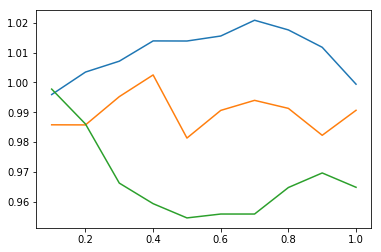

For period 1 the best percenteage is: 0.7000000000000001
For period 2 the best percenteage is: 0.4
For period 3 the best percenteage is: 0.1
For period 4 the best percenteage is: 0.8


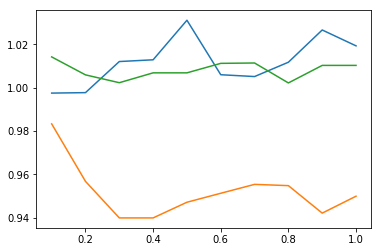

For period 1 the best percenteage is: 0.5
For period 2 the best percenteage is: 0.1
For period 3 the best percenteage is: 0.1
For period 4 the best percenteage is: 0.7000000000000001


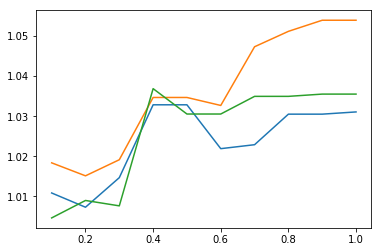

For period 1 the best percenteage is: 0.4
For period 2 the best percenteage is: 0.9
For period 3 the best percenteage is: 0.4
For period 4 the best percenteage is: 0.6


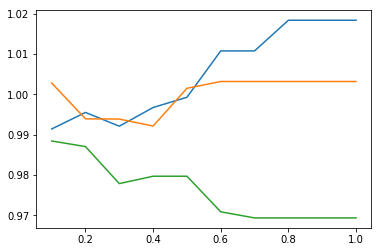

For period 1 the best percenteage is: 0.8
For period 2 the best percenteage is: 0.6
For period 3 the best percenteage is: 0.1
For period 4 the best percenteage is: 0.2


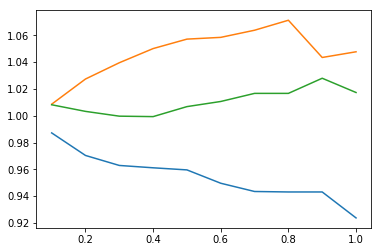

For period 1 the best percenteage is: 0.1
For period 2 the best percenteage is: 0.8
For period 3 the best percenteage is: 0.9
For period 4 the best percenteage is: 0.30000000000000004


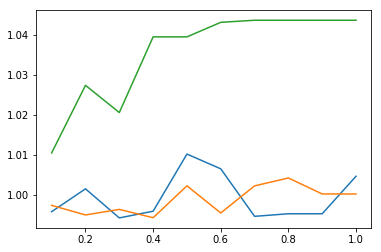

For period 1 the best percenteage is: 0.5
For period 2 the best percenteage is: 0.8
For period 3 the best percenteage is: 0.7000000000000001
For period 4 the best percenteage is: 0.1


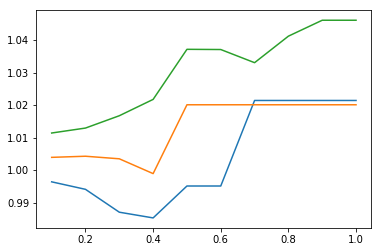

For period 1 the best percenteage is: 0.7000000000000001
For period 2 the best percenteage is: 0.5
For period 3 the best percenteage is: 0.9
For period 4 the best percenteage is: 0.1


In [90]:
## NEW CODE ##

num_periods = 4
steps = 10
percentages = np.linspace(0.1,1.1,steps,endpoint=False)
perc_counter = Counter()

for year in range(2010, 2018):
    periods_outcome = [0] * (num_periods+1)
    for i in range(num_periods+1):
        periods_outcome[i] = []

    for iteration, percentage in enumerate(percentages):
        outcomes = check_diff_percentage_over_time(num_periods, year, percentage)
        for idx,outcome in enumerate(outcomes):
            periods_outcome[idx].append(outcome)

    if periods_outcome[-1] == []:
        del periods_outcome[-1]

    for y in periods_outcome[:-1]:
        plt.plot(percentages, y)
    plt.show()


    # Print for each period which percentage was the best for it
    for idx,outcomes in enumerate(periods_outcome):
        max_idx = periods_outcome[idx].index(max(periods_outcome[idx]))
        if percentages[max_idx] not in perc_counter:
            perc_counter[percentages[max_idx]] = 0
        perc_counter[percentages[max_idx]] += 1
        print("For period {} the best percenteage is: {}".format(idx+1, percentages[max_idx]))

In [93]:
perc_counter

Counter({0.1: 7,
         0.2: 1,
         0.30000000000000004: 2,
         0.4: 3,
         0.5: 5,
         0.6: 2,
         0.7000000000000001: 4,
         0.8: 4,
         0.9: 3,
         1.0: 1})

In [92]:
def check_strategy_1(change_rate):
    money = 100
    temp = money
    for i in range(2010,2018):
        rate = trade(i, startegy1, change_rate=change_rate)
        money = money * rate
        str_rate = "{0:.2f}%".format((rate - 1) * 100)
        print("Year:{}, Yield:{}".format(i,str_rate))
    print ("Total {}: {}%".format("Strategy 1",100*(money/temp-1)))

In [89]:
change_rates = np.linspace(0.1,1.1,10,endpoint=False)
for change in change_rates:
    print("Change is: {}".format(change))
    check_strategy_1(change)

Change is: 0.1
Year:2013, Yield:3.39%
Year:2014, Yield:-3.72%
Year:2015, Yield:1.10%
Year:2016, Yield:-0.08%
Year:2017, Yield:1.74%
Total Strategy 1: 2.3050327165938356%
Change is: 0.2
Year:2013, Yield:4.46%
Year:2014, Yield:-3.72%
Year:2015, Yield:0.89%
Year:2016, Yield:0.00%
Year:2017, Yield:0.07%
Total Strategy 1: 1.547692926279698%
Change is: 0.30000000000000004
Year:2013, Yield:6.86%
Year:2014, Yield:-5.39%
Year:2015, Yield:0.93%
Year:2016, Yield:-1.74%
Year:2017, Yield:-0.38%
Total Strategy 1: -0.11577969205422978%
Change is: 0.4
Year:2013, Yield:13.87%
Year:2014, Yield:-5.83%
Year:2015, Yield:-1.53%
Year:2016, Yield:-0.03%
Year:2017, Yield:-0.64%
Total Strategy 1: 4.893702292407953%
Change is: 0.5
Year:2013, Yield:14.06%
Year:2014, Yield:-4.05%
Year:2015, Yield:-0.44%
Year:2016, Yield:2.05%
Year:2017, Yield:3.74%
Total Strategy 1: 15.351073526948511%
Change is: 0.6
Year:2013, Yield:13.10%
Year:2014, Yield:-4.08%
Year:2015, Yield:-1.99%
Year:2016, Yield:2.35%
Year:2017, Yield:3.7

## Compare between strategy1 and strategy2 

In [91]:
def print_strategy_report(strategy, strategy_name):
    print("{}:".format(strategy_name))
    money = 100
    temp = money
    for i in range(2008,2019):
        rate = trade(i, strategy)
        money = money * rate
        str_rate = "{0:.2f}%".format((rate - 1) * 100)
        print("Year:{}, Yield:{}".format(i,str_rate))
    print ("Total {}: {}%".format(strategy_name,100*(money/temp-1)))

print_strategy_report(startegy1, "Strategy 1")
print_strategy_report(startegy2, "Strategy 2")


Strategy 1:


TypeError: trade() missing 1 required positional argument: 'change_rate'

## Server

In [1]:
import unirest
from datetime import date, timedelta
from flask import request
from flask import jsonify

In [7]:
from flask import Flask
app = Flask(__name__)



@app.route('/')
def hello():
    return "Hello World!"

@app.route('/shouldInvest')
def shouldInvest():
    current_currency = request.args.get('curr')
    return should_i_invest(current_currency)

@app.route('/getLastDaysRatios')
def getLastDays():
    return jsonify(get_last_days_ratios())

if __name__ == '__main__':
    app.run()

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [24/May/2019 16:50:54] "GET /shouldInvest?curr=USD HTTP/1.1" 200 -
127.0.0.1 - - [24/May/2019 16:50:57] "GET /getLastDaysRatios HTTP/1.1" 200 -
127.0.0.1 - - [24/May/2019 16:51:00] "GET /getLastDaysRatios HTTP/1.1" 200 -
127.0.0.1 - - [24/May/2019 16:51:03] "GET /shouldInvest?curr=USD HTTP/1.1" 200 -


In [3]:
## API: https://exchangeratesapi.io/

CHANGE_RATE = 0.1
SELL = "SELL"
HOLD = "HOLD"

def get_yesterday_radio():
    yesterday = date.today() - timedelta(days=1)
    yesterday = yesterday.strftime("%Y-%m-%d")
    res = unirest.get("https://api.exchangeratesapi.io/{}".format(yesterday))
    
    return res.body["rates"]["USD"]


def get_today_ratio():
    res = unirest.get("https://api.exchangeratesapi.io/latest")
    
    return res.body["rates"]["USD"]

def strategy(today_ratio, yesterday_ratio, current_currency):
    if today_ratio < yesterday_ratio:
        change = 100*(1-(today_ratio/yesterday_ratio))
        if change > CHANGE_RATE:
            if current_currency == "EUR":
                return SELL
        else:
            if current_currency == "USD":
                return SELL
    else:
        if current_currency == "EUR":
            return SELL
    
    return HOLD

def should_i_invest(current_currency):
    yesterday_ratio = get_yesterday_radio()
    today_ratio = get_today_ratio()
    return strategy(today_ratio, yesterday_ratio, current_currency)


def get_last_days_ratios():
    days_ago = date.today() - timedelta(days=10)
    days_ago = days_ago.strftime("%Y-%m-%d")
    today = date.today()
    today = today.strftime("%Y-%m-%d")

    res = unirest.get("https://api.exchangeratesapi.io/history?start_at={}&end_at={}".format(days_ago, today))
    data = {}
    for x in res.body["rates"]:
        data[x] = res.body["rates"][x]["USD"]

    return data

In [4]:
should_i_invest("USD")

'HOLD'

In [5]:
get_last_days_ratios()

{u'2019-05-14': 1.1226,
 u'2019-05-15': 1.1183,
 u'2019-05-16': 1.1203,
 u'2019-05-17': 1.1172,
 u'2019-05-20': 1.1167,
 u'2019-05-21': 1.1161,
 u'2019-05-22': 1.1171,
 u'2019-05-23': 1.1139}